# - 8px - Grayscale -

In [1]:
import matplotlib.pyplot as plt
from img_driver import Img_Driver
from datetime import datetime
import numpy as np
import random
import time
import sys
import os

def index(lis):
    count = 0
    elt = 0
    for i in range(0, len(lis)):
        if(lis[i] > elt):
            count = i
            elt = lis[i]
    return count

## Neural

In [2]:
driver = Img_Driver()

X = driver.pixels_rgb(8, rgb=False, divider=255)
Y = driver.define_y(8, rgb=False)

X_test = driver.pixels_rgb(8, rgb=False, divider=255, test=True)
Y_test = driver.define_y(8, rgb=False, test=True)

random.seed(0)
random.shuffle(X)
random.seed(0)
random.shuffle(Y)

print(f"X : {len(X)} {len(X[0])}")
print(X[0:1])
print()
print(f"Y : {len(Y)}")
print(Y[0:10])
print()

print(f"X_test : {len(X_test)} {len(X_test[0])}")
print(X_test[0:1])
print()
print(f"Y_test : {len(Y_test)}")
print(Y[0:10])

X : 2453 64
[[0.9176470588235294, 0.7529411764705882, 0.5215686274509804, 0.43137254901960786, 0.4, 0.3803921568627451, 0.4745098039215686, 0.9529411764705882, 0.8941176470588236, 0.6862745098039216, 0.4823529411764706, 0.40784313725490196, 0.4, 0.38823529411764707, 0.4196078431372549, 0.8980392156862745, 0.8274509803921568, 0.6352941176470588, 0.42745098039215684, 0.4235294117647059, 0.41568627450980394, 0.3843137254901961, 0.3803921568627451, 0.8313725490196079, 0.7529411764705882, 0.5098039215686274, 0.3686274509803922, 0.34509803921568627, 0.3803921568627451, 0.3607843137254902, 0.3215686274509804, 0.6862745098039216, 0.796078431372549, 0.44313725490196076, 0.30196078431372547, 0.27058823529411763, 0.28627450980392155, 0.3215686274509804, 0.3058823529411765, 0.6392156862745098, 0.5254901960784314, 0.3411764705882353, 0.3058823529411765, 0.26666666666666666, 0.23921568627450981, 0.24313725490196078, 0.2549019607843137, 0.6235294117647059, 0.14901960784313725, 0.25882352941176473, 0.

### 1

139520
[-0.95352, 0.9939319, -0.9970986]
[0, 0, 1]






































































































10660.84282040596


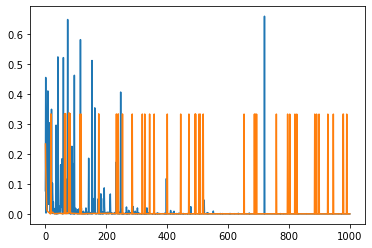

In [3]:
from ruster_neural import Ruster_Neural
r = Ruster_Neural(path="C:\\Users\\Revive\\PycharmProjects\\Rust_Native_ML\\rust\\PerceptronLib\\target\\release\\PerceptronLib.dll")
t1 = time.time()

XF = [item for sublist in X for item in sublist]
YF = [item for sublist in Y for item in sublist]

print(len(XF))

layer_count = 6
input_count = 64
hidden_count = 64
output_count = 3

losses = []
test_losses = []

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

value = r.predict_nn(nn, X[0], True, 3)
value = [value[0], value[1], value[2]]
print(value)
print(Y[6])
print()

for _ in range(1000):
    r.train_nn(nn, XF, YF, 50, 0.0003, True)
    
    rand_idx = random.randint(0, len(X)-1)
    y_predict = r.predict_nn(nn, X[rand_idx], True, 3)
    y_predict = [y_predict[0], y_predict[1], y_predict[2]]
    loss = r.mse(y_predict, Y[rand_idx])
    losses.append(loss)
    
    dummy_y = r.predict_nn(nn, X[0], True, 3)
    dummy_predict = [dummy_y[0], dummy_y[1], dummy_y[2]]
    test_loss = r.mse(dummy_y, Y[0])
    test_losses.append(test_loss)
    
    if _%10 == 0:

#         value = r.predict_nn(nn, X[0], False, 3)
#         value = [value[0], value[1], value[2]]
#         loss = r.mse(value, Y[0])
#         losses.append(loss)
#         print(value)
#         print(Y[0])
#         print()
        
#         print(f"[{_}] [loss : {round(loss, 8)}] [idx: {rand_idx}] [predict: {y_predict}] [Y: {Y[rand_idx]}]")
        print()

print()
t2 = time.time()
print(t2 - t1)
plt.plot(losses)
plt.plot(test_losses)
plt.show()

r.store_nn(nn, 80201)
r.release_nn(nn)

In [24]:
predicts = []

nn_loaded = r.load_nn(80201)

for i in range(len(X)):
    y_predict = r.predict_nn(nn_loaded, X[i], True, 3)
    y_predict = [y_predict[0], y_predict[1], y_predict[2]]
    predicts.append(y_predict)
#     loss = r.mse(y_predict, Y[rand_idx])
#     print(f"Out : {y_predict} Y : {Y[i]} Loss : [{loss}]")
    
r.release_nn(nn_loaded)

count = 0

for i in range(len(X)):
    if(index(predicts[i]) == index(Y[i])):
        count += 1
        
print(count / len(X) * 100)

91.43905421932328


### 2

156992
[0.13396733, -0.9998553, 0.8252443]
[0, 0, 1]










































9532.714303255081


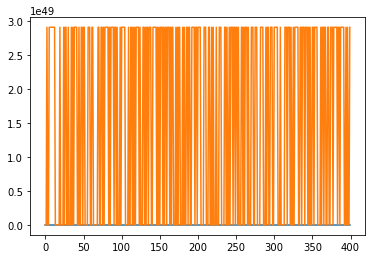

In [3]:
from ruster_neural import Ruster_Neural
r = Ruster_Neural(path="C:\\Users\\Revive\\PycharmProjects\\Rust_Native_ML\\rust\\PerceptronLib\\target\\release\\PerceptronLib.dll")
t1 = time.time()

XF = [item for sublist in X for item in sublist]
YF = [item for sublist in Y for item in sublist]

print(len(XF))

layer_count = 6
input_count = 64
hidden_count = 96
output_count = 3

losses = []
test_losses = []

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

value = r.predict_nn(nn, X[0], True, 3)
value = [value[0], value[1], value[2]]
print(value)
print(Y[6])
print()

for _ in range(400):
    r.train_nn(nn, XF, YF, 50, 0.0003, True)
    
    rand_idx = random.randint(0, len(X)-1)
    y_predict = r.predict_nn(nn, X[rand_idx], True, 3)
    y_predict = [y_predict[0], y_predict[1], y_predict[2]]
    loss = r.mse(y_predict, Y[rand_idx])
    losses.append(loss)
    
    dummy_y = r.predict_nn(nn, X[0], True, 3)
    dummy_predict = [dummy_y[0], dummy_y[1], dummy_y[2]]
    test_loss = r.mse(dummy_y, Y[0])
    test_losses.append(test_loss)
    
    if _%10 == 0:

#         value = r.predict_nn(nn, X[0], False, 3)
#         value = [value[0], value[1], value[2]]
#         loss = r.mse(value, Y[0])
#         losses.append(loss)
#         print(value)
#         print(Y[0])
#         print()
        
#         print(f"[{_}] [loss : {round(loss, 8)}] [idx: {rand_idx}] [predict: {y_predict}] [Y: {Y[rand_idx]}]")
        print()

print()
t2 = time.time()
print(t2 - t1)
plt.plot(losses)
plt.plot(test_losses)
plt.show()

r.store_nn(nn, 80401)
r.release_nn(nn)

In [25]:
predicts = []

nn_loaded = r.load_nn(80401)

for i in range(len(X)):
    y_predict = r.predict_nn(nn_loaded, X[i], True, 3)
    y_predict = [y_predict[0], y_predict[1], y_predict[2]]
    predicts.append(y_predict)
#     loss = r.mse(y_predict, Y[rand_idx])
#     print(f"Out : {y_predict} Y : {Y[i]} Loss : [{loss}]")
    
r.release_nn(nn_loaded)

count = 0

for i in range(len(X)):
    if(index(predicts[i]) == index(Y[i])):
        count += 1
        
print(count / len(X) * 100)

35.2221769262128


### 3

156992
[-0.99999946, 0.9999999, -0.99965215]
[0, 0, 1]

47.323936462402344
[0] [loss : 0.07382969] [idx: 341] [predict: [0.42014074, 0.9999999, 0.21206327]] [Y: [0, 1, 0]]

520.0233716964722
[10] [loss : 0.00851038] [idx: 1127] [predict: [0.88290894, 0.059384607, -0.09107294]] [Y: [1, 0, 0]]

993.4281520843506
[20] [loss : 0.0576393] [idx: 1675] [predict: [0.929955, 0.4071103, -0.04767401]] [Y: [1, 0, 0]]

1464.057665348053
[30] [loss : 0.00732442] [idx: 1174] [predict: [0.87775683, 0.058623135, 0.05994337]] [Y: [1, 0, 0]]

1935.3040800094604
[40] [loss : 0.00179902] [idx: 198] [predict: [-0.047683764, 0.015534045, 0.94631565]] [Y: [0, 0, 1]]

2409.514797925949
[50] [loss : 0.00277777] [idx: 2385] [predict: [0.9795819, 0.03864812, -0.080142036]] [Y: [1, 0, 0]]

2884.8176238536835
[60] [loss : 0.00078285] [idx: 694] [predict: [0.97850955, 0.018682571, -0.03921321]] [Y: [1, 0, 0]]

3359.1750535964966
[70] [loss : 0.34909612] [idx: 403] [predict: [0.81655854, 0.024051914, 0.38360563]] [Y:

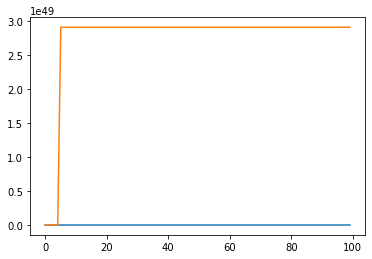

In [3]:
from ruster_neural import Ruster_Neural
r = Ruster_Neural(path="C:\\Users\\Revive\\PycharmProjects\\Rust_Native_ML\\rust\\PerceptronLib\\target\\release\\PerceptronLib.dll")
t1 = time.time()

XF = [item for sublist in X for item in sublist]
YF = [item for sublist in Y for item in sublist]

print(len(XF))

layer_count = 6
input_count = 64
hidden_count = 128
output_count = 3

losses = []
test_losses = []

nn = r.create_nn(layer_count, input_count, hidden_count, output_count)

value = r.predict_nn(nn, X[0], True, 3)
value = [value[0], value[1], value[2]]
print(value)
print(Y[6])
print()

for _ in range(100):
    r.train_nn(nn, XF, YF, 50, 0.001, True)
    
    rand_idx = random.randint(0, len(X)-1)
    y_predict = r.predict_nn(nn, X[rand_idx], True, 3)
    y_predict = [y_predict[0], y_predict[1], y_predict[2]]
    loss = r.mse(y_predict, Y[rand_idx])
    losses.append(loss)
    
    dummy_y = r.predict_nn(nn, X[0], True, 3)
    dummy_predict = [dummy_y[0], dummy_y[1], dummy_y[2]]
    test_loss = r.mse(dummy_y, Y[0])
    test_losses.append(test_loss)
    
    if _%10 == 0:

#         value = r.predict_nn(nn, X[0], False, 3)
#         value = [value[0], value[1], value[2]]
#         loss = r.mse(value, Y[0])
#         losses.append(loss)
#         print(value)
#         print(Y[0])
#         print()

        t2 = time.time()
        print(t2 - t1)
        print(f"[{_}] [loss : {round(loss, 8)}] [idx: {rand_idx}] [predict: {y_predict}] [Y: {Y[rand_idx]}]")
        print()

print()
t2 = time.time()
print(t2 - t1)
plt.plot(losses)
plt.plot(test_losses)
plt.show()

r.store_nn(nn, 80501)
r.release_nn(nn)

In [ ]:
predicts = []

nn_loaded = r.load_nn(80501)

for i in range(len(X)):
    y_predict = r.predict_nn(nn_loaded, X[i], True, 3)
    y_predict = [y_predict[0], y_predict[1], y_predict[2]]
    predicts.append(y_predict)
#     loss = r.mse(y_predict, Y[rand_idx])
#     print(f"Out : {y_predict} Y : {Y[i]} Loss : [{loss}]")
    
r.release_nn(nn_loaded)

count = 0

for i in range(len(X)):
    if(index(predicts[i]) == index(Y[i])):
        count += 1
        
print(count / len(X) * 100)

## Linear

## Radial